# Checking Dir

In [1]:
import os


# Directories with our training  pictures

train_plane_dir= os.path.join("C:\DSet\Train\Aeroplane")

train_chair_dir= os.path.join("C:\DSet\Train\Chair")

train_house_dir= os.path.join("C:\DSet\Train\House")


validation_plane_dir= os.path.join("C:\DSet\Validation\Aeroplane")

validation_chair_dir= os.path.join("C:\DSet\Validation\Chair")

validation_house_dir= os.path.join("C:\DSet\Validation\House")




In [2]:
#check to see if directories are correct


train_plane_names = os.listdir(train_plane_dir)
#print(train_plane_names)

train_chair_names = os.listdir(train_chair_dir)
#print(train_chair_names)

train_house_names = os.listdir(train_house_dir)
#print(train_house_names)

validation_plane_names=os.listdir(validation_plane_dir)
#print(validation_plane_names)

validation_chair_names=os.listdir(validation_chair_dir)
#print(validation_chair_names)

validation_chair_names=os.listdir(validation_chair_dir)
#print(validation_plane_names)

print('total training plane images:', len(os.listdir(train_plane_dir)))
print('total training chair images:', len(os.listdir(train_chair_dir)))
print('total training house images:', len(os.listdir(train_house_dir)))
print('total validation plane images:', len(os.listdir(validation_plane_dir)))
print('total validation chair images:', len(os.listdir(validation_chair_dir)))
print('total validation house images:', len(os.listdir(validation_house_dir)))






total training plane images: 910
total training chair images: 901
total training house images: 905
total validation plane images: 197
total validation chair images: 197
total validation house images: 218


# Creating the Model

In [3]:
import tensorflow as tf

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)       

In [8]:


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'C:\DSet\Train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 320*240
        batch_size=64,
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:\DSet\Validation',  
        target_size=(300, 300), 
        batch_size=32,
        class_mode='sparse')


Found 2716 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/5
8/8 [==============================] - 32s 4s/step - loss: 0.7113 - accuracy: 0.6406 - val_loss: 0.4740 - val_accuracy: 0.8477
Epoch 2/5
8/8 [==============================] - 35s 4s/step - loss: 0.2197 - accuracy: 0.9258 - val_loss: 0.3300 - val_accuracy: 0.8359
Epoch 3/5
8/8 [==============================] - 31s 4s/step - loss: 0.1368 - accuracy: 0.9590 - val_loss: 0.1219 - val_accuracy: 0.9727
Epoch 4/5
8/8 [==============================] - 35s 4s/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.1214 - val_accuracy: 0.9883
Epoch 5/5
8/8 [==============================] - 32s 4s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9961


C:\Users\Abhiroop\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


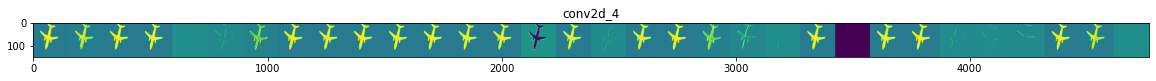

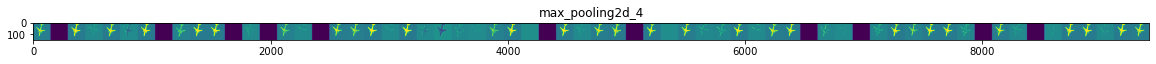

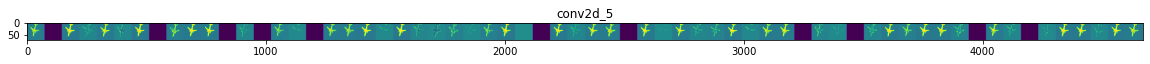

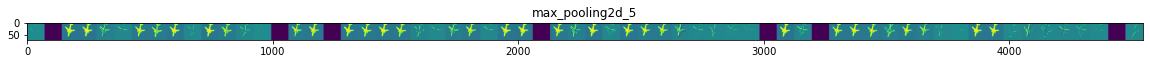

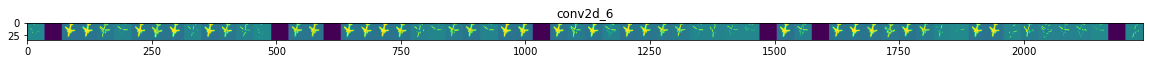

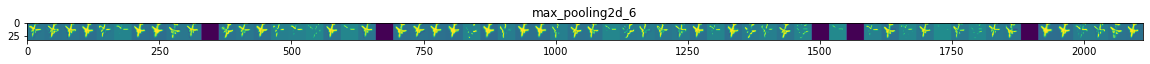

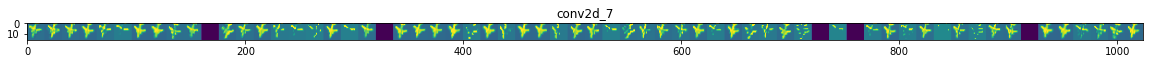

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

plane_img_files = [os.path.join(train_plane_dir, f) for f in train_plane_names]
chair_img_files = [os.path.join(train_chair_dir, f) for f in train_chair_names]
house_img_files = [os.path.join(train_house_dir, f) for f in train_house_names]
img_path = random.choice(plane_img_files + chair_img_files+house_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)


x /= 255


successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
       
        n_features = feature_map.shape[-1]  
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
          x = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std()
          x *= 64
          x += 128
          x = np.clip(x, 0, 255).astype('uint8')
          
          display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')